<a href="https://colab.research.google.com/github/NIKHILNARSIPALLI/pfsinterns/blob/main/Heart%20Disease%20Prediction/Heart_Disease_Prediction_pnfsintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: install Kaggle library

!pip install kaggle

In [ ]:
#API to fetch the dataset from kaggle
! kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 14.2MB/s]


In [ ]:
#Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/heart-disease-data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The File has been extracted successfully")

The File has been extracted successfully


# Steps in a Machine Learning Projects - AFTERS:

1. Aquire the data

2. Filter the data

3. Transform the data

4. Explore the data

5. Split the data

# Data column description


Column Descriptions:

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm  Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

In [ ]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sc
import seaborn as sns

# Importing the Data

In [ ]:
# Reading the data file

df  = pd.read_csv('/content/heart_disease_uci.csv')


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.shape

(920, 16)

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
# the columns id and dataset do not provide any analytical information so we remove them

df = df.drop(['id','dataset'],axis=1)

In [ ]:
df.shape

(920, 14)

# Filter the Data

In [ ]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

<Axes: >

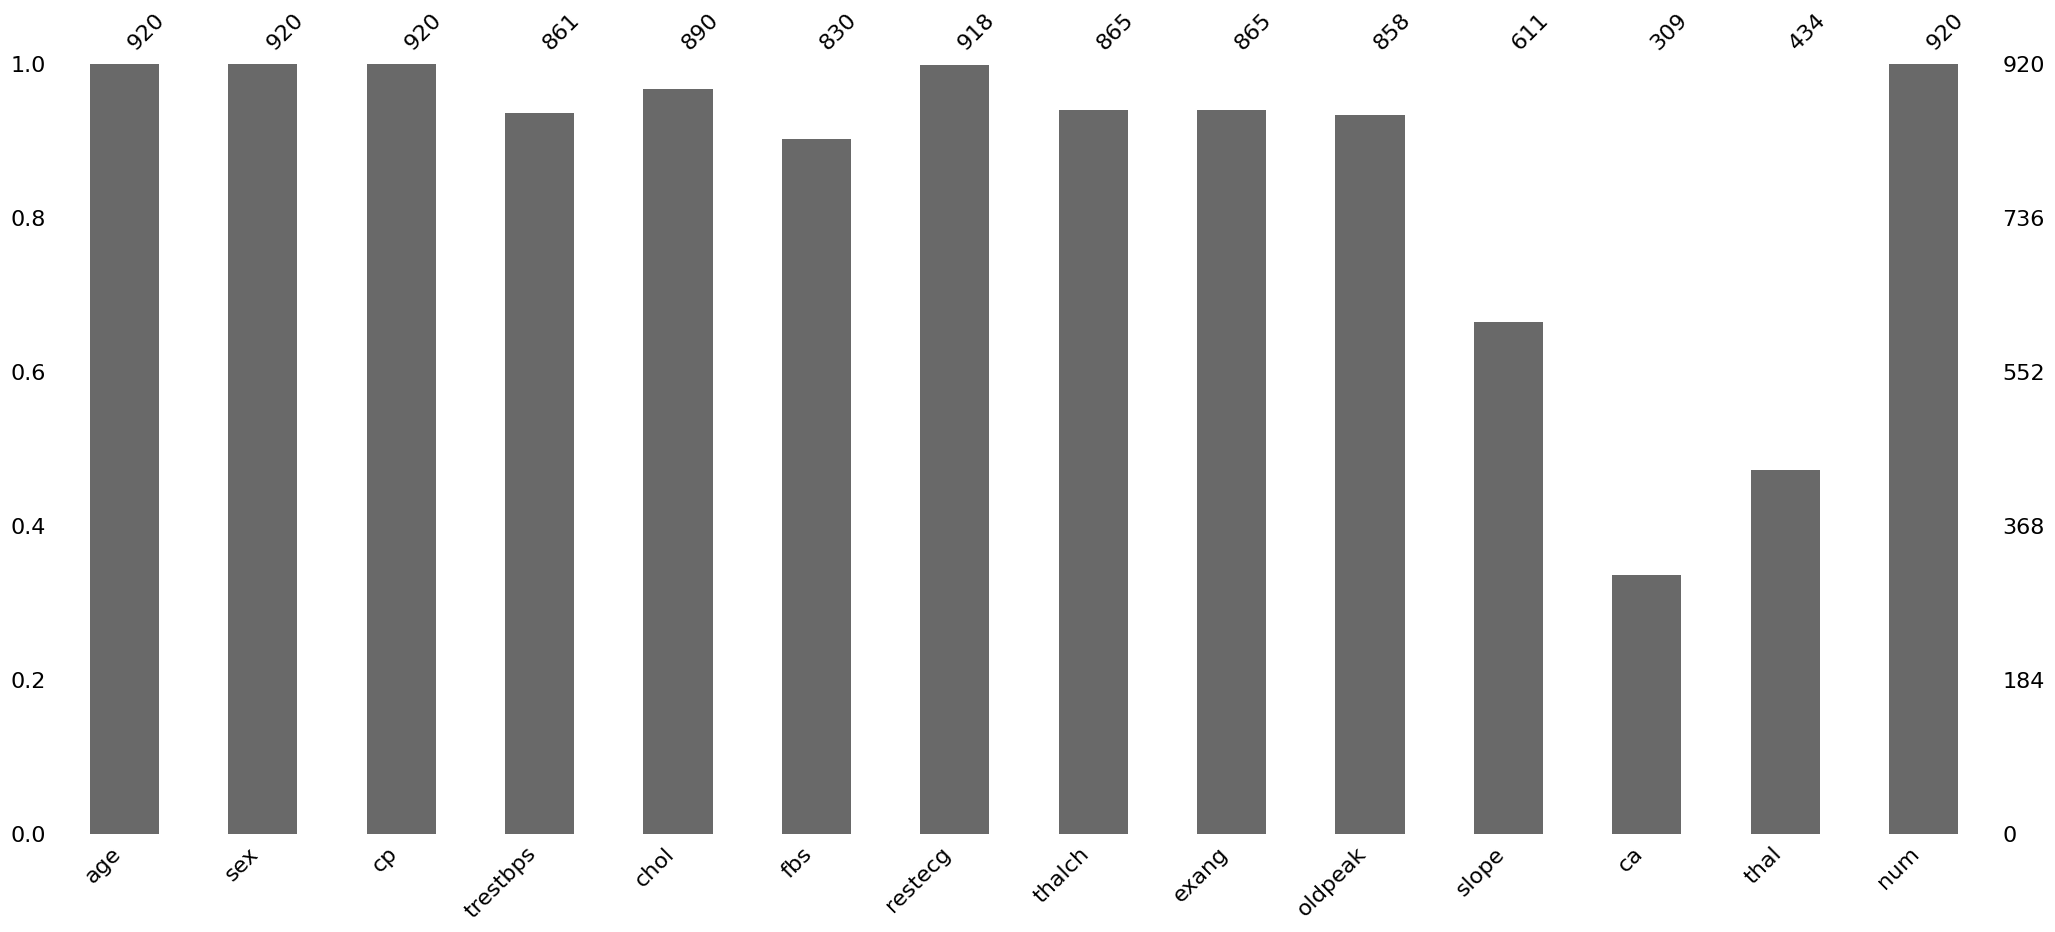

In [ ]:
# checking the extent of missing values using visualization

import missingno as msno
msno.bar(df)

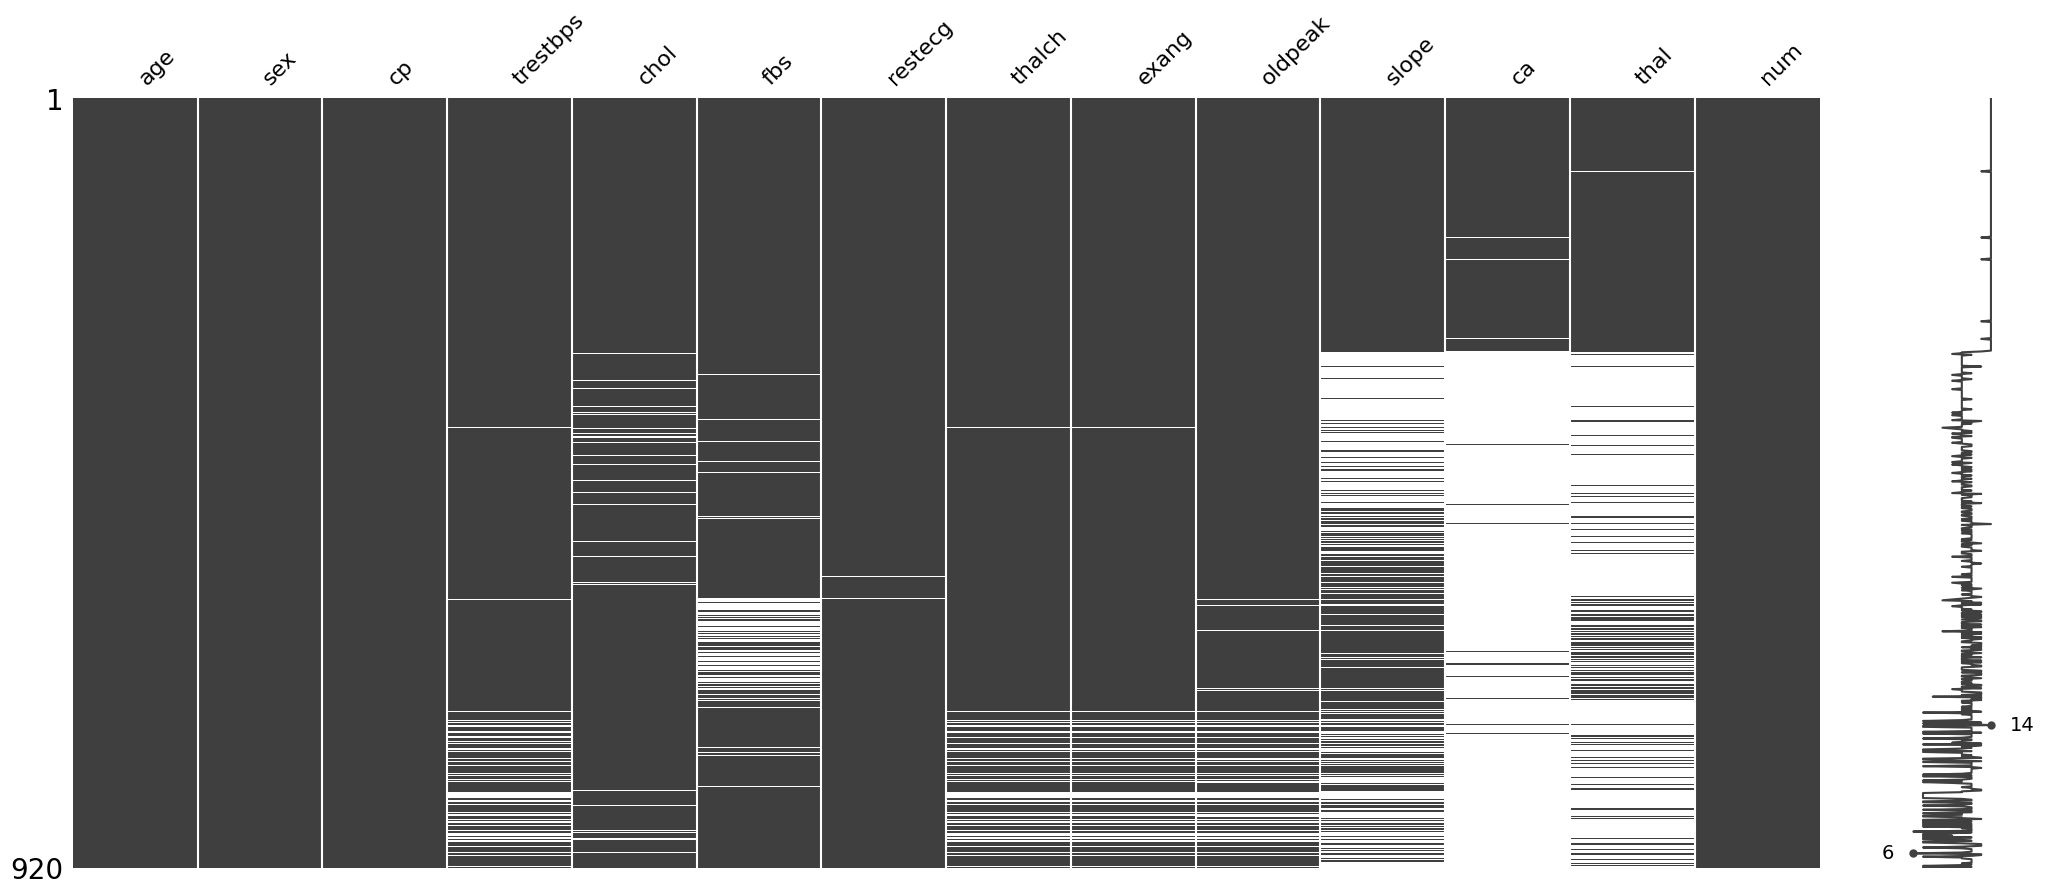

In [ ]:
#checking the relative missingness of the rows and columns
msno.matrix(df)
plt.show()

In [ ]:
# let's see the percentage of missing values in each column

df.isnull().sum()/len(df)*100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [ ]:
# As we can see the amount of missing values in the columns slope, ca, and thal are huge
# so we drop those columns

df = df.drop(['slope','ca','thal'],axis=1)

In [ ]:
#let's check the percentages again to confirm the drop of the columns

df.isnull().sum()/len(df)*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    6.413043
chol        3.260870
fbs         9.782609
restecg     0.217391
thalch      5.978261
exang       5.978261
oldpeak     6.739130
num         0.000000
dtype: float64

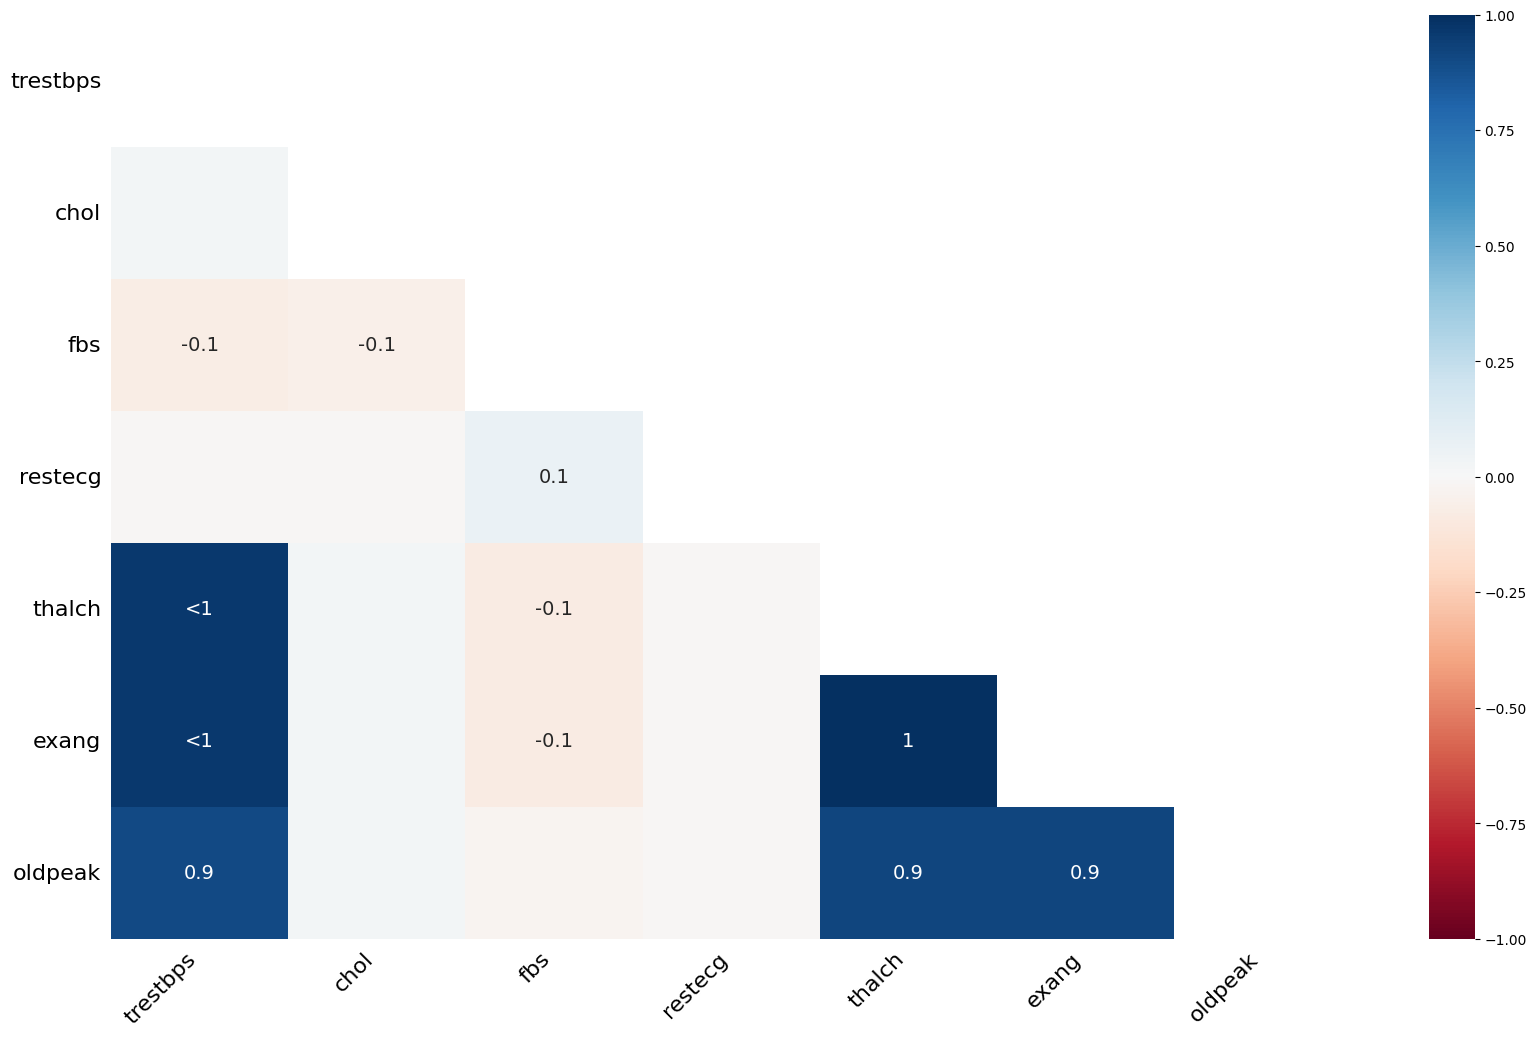

In [ ]:
# let's check for the corelation between the missing values

msno.heatmap(df)
plt.show()

In [ ]:
# since the correlation between the mossing valus in the columns thalch, exang and oldpeak
# let's remove missing values from those rows where there are missing values in all 3 columns

df = df.dropna(how='all', subset=['thalch','exang','oldpeak'])

In [ ]:
#let's check for percentage of missing values again

df.isnull().sum()/len(df)*100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     0.577367
chol         3.117783
fbs         10.392610
restecg      0.230947
thalch       0.115473
exang        0.115473
oldpeak      0.923788
num          0.000000
dtype: float64

In [ ]:
# let's try the same for the columns fbs and chol

df = df.dropna(how='any', subset=['fbs','chol'])

In [ ]:
# checking

df.isnull().sum()/len(df)*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.534045
chol        0.000000
fbs         0.000000
restecg     0.133511
thalch      0.133511
exang       0.133511
oldpeak     0.534045
num         0.000000
dtype: float64

In [ ]:
df.shape

(749, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       749 non-null    int64  
 1   sex       749 non-null    object 
 2   cp        749 non-null    object 
 3   trestbps  745 non-null    float64
 4   chol      749 non-null    float64
 5   fbs       749 non-null    object 
 6   restecg   748 non-null    object 
 7   thalch    748 non-null    float64
 8   exang     748 non-null    object 
 9   oldpeak   745 non-null    float64
 10  num       749 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 70.2+ KB


In [ ]:
# Filling missing values of the remaining columns of the df

# for the column restecg

df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])

# for the column exang

df['exang'] = df['exang'].fillna(df['exang'].mode()[0])

# for the column oldpeak

df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

# for the column trestbps

df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

# for the column thalch

df['thalch'] = df['thalch'].fillna(df['thalch'].mean())

In [ ]:
# let's check again for the percentage of missing values

df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
num         0.0
dtype: float64

# Transforming the Data

In [ ]:
#let's check for the unique values and transform the dataset with one-hot encoding

df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [ ]:
df['fbs'].unique()

array([True, False], dtype=object)

In [ ]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [ ]:
df['exang'].unique()

array([False,  True])

In [ ]:
# Creating a variabel for storing categorical columns

categorical_columns = ['sex','cp','fbs','restecg','exang']

# One-hot encode categorical columns
one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Convert boolean values to integers (0 and 1)
one_hot_encoded = one_hot_encoded.astype(int)

# Drop original categorical columns from the DataFrame
df_clean = df.drop(categorical_columns, axis=1)

# Concatenate one-hot encoded DataFrame with the original DataFrame
df_clean = pd.concat([df_clean, one_hot_encoded], axis=1)

# Display the encoded DataFrame
print(df_clean.head())

   age  trestbps   chol  thalch  oldpeak  num  exang  sex_Female  sex_Male  \
0   63     145.0  233.0   150.0      2.3    0      0           0         1   
1   67     160.0  286.0   108.0      1.5    2      1           0         1   
2   67     120.0  229.0   129.0      2.6    1      1           0         1   
3   37     130.0  250.0   187.0      3.5    0      0           0         1   
4   41     130.0  204.0   172.0      1.4    0      0           1         0   

   cp_asymptomatic  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                0                   0               0                  1   
1                1                   0               0                  0   
2                1                   0               0                  0   
3                0                   0               1                  0   
4                0                   1               0                  0   

   fbs_False  fbs_True  restecg_lv hypertrophy  restecg_normal  \
0 

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 919
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       749 non-null    int64  
 1   trestbps                  749 non-null    float64
 2   chol                      749 non-null    float64
 3   thalch                    749 non-null    float64
 4   oldpeak                   749 non-null    float64
 5   num                       749 non-null    int64  
 6   exang                     749 non-null    int64  
 7   sex_Female                749 non-null    int64  
 8   sex_Male                  749 non-null    int64  
 9   cp_asymptomatic           749 non-null    int64  
 10  cp_atypical angina        749 non-null    int64  
 11  cp_non-anginal            749 non-null    int64  
 12  cp_typical angina         749 non-null    int64  
 13  fbs_False                 749 non-null    int64  
 14  fbs_True       

# Splitig tha Data into train test split

In [ ]:
# Let's import the necessasry libraries for this process


# for classification evaluation metrices
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,precision_score,mean_squared_error,r2_score

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for splitting the data
from sklearn.model_selection import train_test_split

In [ ]:
# split data into X and y
# we are dropping num because it is the predicted value we have to train against

X = df_clean.drop(['num'], axis=1)
y = df_clean['num']

In [ ]:
# for splitting the data
from sklearn.model_selection import train_test_split

# split data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Selecting the Best Model

In [ ]:
# required imports

# Given that we anticipate solving our dependent feature through classification, we will proceed to import libraries tailored for classification tasks.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor ,AdaBoostClassifier ,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#ignore warning
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

In [ ]:
# creating variables for best model

best_model = None
best_accuracy = 0

for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.5876750700280111
Test Accuracy: 0.5533333333333333

Model: Gradient Boosting
Cross-validation Accuracy: 0.5543277310924369
Test Accuracy: 0.5466666666666666

Model: Support Vector Machine
Cross-validation Accuracy: 0.49753501400560224
Test Accuracy: 0.52

Model: Logistic Regression
Cross-validation Accuracy: 0.5676470588235294
Test Accuracy: 0.62

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.4792436974789916
Test Accuracy: 0.58

Model: Decision Tree
Cross-validation Accuracy: 0.4973669467787114
Test Accuracy: 0.49333333333333335

Model: Ada Boost
Cross-validation Accuracy: 0.5123109243697479
Test Accuracy: 0.5133333333333333

Model: XG Boost
Cross-validation Accuracy: 0.5459103641456582
Test Accuracy: 0.54

Model: Naive Bayes
Cross-validation Accuracy: 0.3872549019607844
Test Accuracy: 0.36

Best Model: Pipeline(steps=[('model', LogisticRegression(random_state=42))])


# Saving the best Accuracy model

In [ ]:
import pickle

pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))